## Storm Events
Exploratory data analysis of storm events from 2010 to 2019. The datasets are from Storm Events Database of National Centers for Environmental Information (NCEI).

#### Get data from Storm Events Database of NCEI

In [1]:
!wget https: // www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2010_c20191116.csv.gz
!mv StormEvents_details-ftp_v1.0_d2010_c20191116.csv.gz StormEvents_2010.csv.gz

!wget https: // www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2011_c20180718.csv.gz
!mv StormEvents_details-ftp_v1.0_d2011_c20180718.csv.gz StormEvents_2011.csv.gz

!wget https: // www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2012_c20200317.csv.gz
!mv StormEvents_details-ftp_v1.0_d2012_c20200317.csv.gz StormEvents_2012.csv.gz

!wget https: // www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2013_c20170519.csv.gz
!mv StormEvents_details-ftp_v1.0_d2013_c20170519.csv.gz StormEvents_2013.csv.gz

!wget https: // www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2014_c20191116.csv.gz
!mv StormEvents_details-ftp_v1.0_d2014_c20191116.csv.gz StormEvents_2014.csv.gz

!wget https: // www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2015_c20191116.csv.gz
!mv StormEvents_details-ftp_v1.0_d2015_c20191116.csv.gz StormEvents_2015.csv.gz

!wget https: // www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2016_c20190817.csv.gz
!mv StormEvents_details-ftp_v1.0_d2016_c20190817.csv.gz StormEvents_2016.csv.gz

!wget https: // www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2017_c20200121.csv.gz
!mv StormEvents_details-ftp_v1.0_d2017_c20200121.csv.gz StormEvents_2017.csv.gz

!wget https: // www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2018_c20200317.csv.gz
!mv StormEvents_details-ftp_v1.0_d2018_c20200317.csv.gz StormEvents_2018.csv.gz

!wget https: // www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2019_c20200416.csv.gz
!mv StormEvents_details-ftp_v1.0_d2019_c20200416.csv.gz StormEvents_2019.csv.gz

--2020-04-27 00:08:08--  ftp://https/
           => '.listing'
Resolving https... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address 'https'
//: Scheme missing.
URL transformed to HTTPS due to an HSTS policy
--2020-04-27 00:08:08--  https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2010_c20191116.csv.gz
Resolving www1.ncdc.noaa.gov... 2610:20:8040:2::172, 2610:20:8040:2::171, 2610:20:8040:2::178, ...
Connecting to www1.ncdc.noaa.gov|2610:20:8040:2::172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11651563 (11M) [application/x-gzip]
Saving to: 'StormEvents_details-ftp_v1.0_d2010_c20191116.csv.gz'

StormEvents_details 100%[===================>]  11.11M  2.76MB/s    in 5.2s    

2020-04-27 00:08:13 (2.13 MB/s) - 'StormEvents_details-ftp_v1.0_d2010_c20191116.csv.gz' saved [11651563/11651563]

FINISHED --2020-04-27 00:08:13--
Total wall clock time: 5.7s
Downloaded: 1 files, 11M in 

Connecting to www1.ncdc.noaa.gov|2610:20:8040:2::172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10592222 (10M) [application/x-gzip]
Saving to: 'StormEvents_details-ftp_v1.0_d2018_c20200317.csv.gz'

StormEvents_details 100%[===================>]  10.10M  2.47MB/s    in 4.5s    

2020-04-27 00:08:57 (2.24 MB/s) - 'StormEvents_details-ftp_v1.0_d2018_c20200317.csv.gz' saved [10592222/10592222]

FINISHED --2020-04-27 00:08:57--
Total wall clock time: 4.8s
Downloaded: 1 files, 10M in 4.5s (2.24 MB/s)
--2020-04-27 00:08:57--  ftp://https/
           => '.listing'
Resolving https... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address 'https'
//: Scheme missing.
URL transformed to HTTPS due to an HSTS policy
--2020-04-27 00:08:57--  https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2019_c20200416.csv.gz
Resolving www1.ncdc.noaa.gov... 2610:20:8040:2::172, 2610:20:8040:2::171, 2610:20:

In [2]:
# import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

%matplotlib inline

## Initial data exploration

In [3]:
df_2010 = pd.read_csv('StormEvents_2010.csv.gz', compression='gzip')
# returns the first five rows
df_2010.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201007,7,1251,201007,7,1630,43850,254780,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong ridge built into Southern New England...,Heat index values at the Nashua Boire Field (K...,CSV
1,201001,17,2300,201001,18,1500,36500,211550,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A coastal storm passing southern New England j...,Four to eight inches fell across eastern Hills...,CSV
2,201010,1,830,201010,1,1000,44854,260014,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Several waves of low pressure moved across Sou...,"In Manchester, firefighters responded to about...",CSV
3,201007,6,951,201007,6,1830,43850,254779,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong ridge built into Southern New England...,Heat index values at the Manchester Airport (K...,CSV
4,201012,26,1700,201012,27,1800,46989,273769,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strengthening winter storm passed southeast ...,Snowfall totals of 6 to 10 inches were observe...,CSV


In [4]:
# check for number of rows and columns
df_2010.shape

(62804, 51)

In [5]:
# check the names of the columns (fields)
df_2010.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [6]:
#  select columns of interest from the yearly Storm Events datasets

selected_columns = ['EVENT_ID', 'STATE', 'YEAR', 'MONTH_NAME',
                    'EVENT_TYPE', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY']

In [7]:
# read and concatenate yearly Storm Events datasets into a single data frame

df = pd.read_csv('StormEvents_2010.csv.gz',
                 compression='gzip')[selected_columns]

for i in range(1, 10):
    df_temp = pd.read_csv('StormEvents_' + str(2010 + i)
                          + '.csv.gz', compression='gzip')
    df = pd.concat([df, df_temp[selected_columns]])

In [8]:
# check for number of rows and columns
df.shape

(626777, 8)

In [9]:
# number of distinct event types
num_types = df['EVENT_TYPE'].nunique()
print("There are {} storm event types.".format(num_types))

There are 56 storm event types.


## Event type
#### Which storm events occured most frequently?

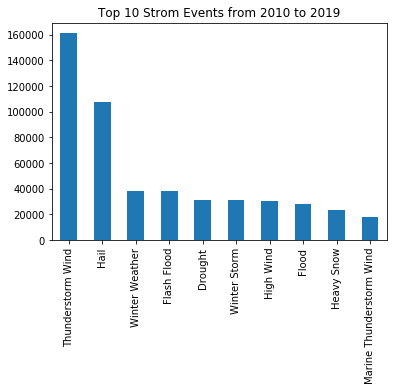

In [10]:
# plot 10 most frequent storm types
df['EVENT_TYPE'].value_counts()[0:10]\
    .plot(kind='bar', title='Top 10 Strom Events from 2010 to 2019')

In [11]:
# check 10 most frequent storm types
df['EVENT_TYPE'].value_counts()[:10]

Thunderstorm Wind           161282
Hail                        107302
Winter Weather               38299
Flash Flood                  38230
Drought                      31440
Winter Storm                 31105
High Wind                    30812
Flood                        27977
Heavy Snow                   23328
Marine Thunderstorm Wind     18380
Name: EVENT_TYPE, dtype: int64

# Fatalities

In [12]:
# check if there are any null values for fatalities
df[['DEATHS_DIRECT', 'DEATHS_INDIRECT']].isnull().any()

DEATHS_DIRECT      False
DEATHS_INDIRECT    False
dtype: bool

In [13]:
def fatality(col_name):
    """ Returns direct, indirect, and total fatalities grouped by col_name. """

    df_fatality = df.groupby(col_name).sum(
    )[['DEATHS_DIRECT', 'DEATHS_INDIRECT']]

    df_fatality['DEATHS_TOTAL'] = df_fatality['DEATHS_DIRECT'] + \
        df_fatality['DEATHS_INDIRECT']

    return df_fatality

## Direct fatalities by event type

#### Which storm events caused the most direct fatalities?

In [14]:
# fatality dataframe grouped by storm type, and sorted by direct fatality
df_fatalityD_event = fatality('EVENT_TYPE').sort_values(
    'DEATHS_DIRECT', ascending=False)

# add cumulative percentage for direct fatality
df_fatalityD_event['cumpercentage'] = df_fatalityD_event['DEATHS_DIRECT']\
    .cumsum() / df_fatalityD_event['DEATHS_DIRECT'].sum()*100

In [15]:
# top 5 storm types for direct fatality
df_fatalityD_event.head()

,DEATHS_DIRECT,DEATHS_INDIRECT,DEATHS_TOTAL,cumpercentage
EVENT_TYPE,,,,
Tornado,910,26,936,16.290727
Flash Flood,692,41,733,28.678840
Excessive Heat,647,129,776,40.261368
Heat,555,194,749,50.196921
Rip Current,489,7,496,58.950949


In [16]:
# total fatalities
df_total_deaths = df_fatalityD_event.sum()
print(df_total_deaths)
print('\n')
print("The total direct fatality is {}.".format(df_total_deaths[0]))

DEATHS_DIRECT      5586.000000
DEATHS_INDIRECT    1985.000000
DEATHS_TOTAL       7571.000000
cumpercentage      5070.676692
dtype: float64


The total direct fatality is 5586.0.


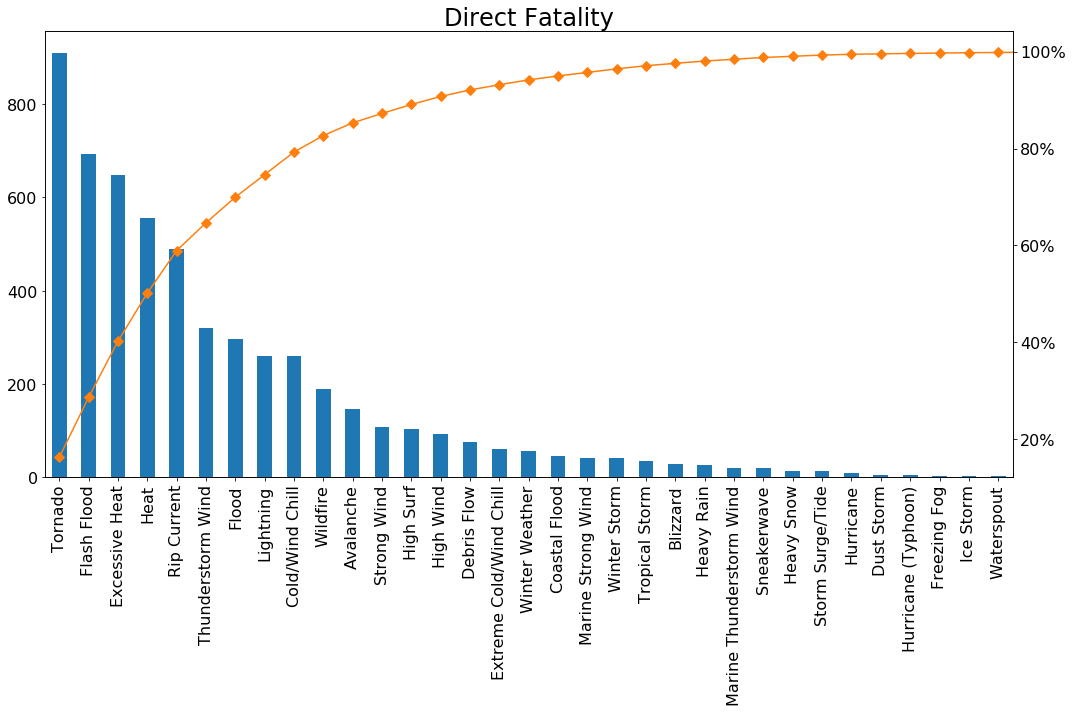

In [17]:
# create and save direct_fatalities bar plot

fig, axs = plt.subplots(figsize=(15, 10))

# plot direct fatality
df_fatalityD_event['DEATHS_DIRECT'][:33].plot(kind='bar')
axs.set_title('Direct Fatality', fontsize=24)
axs.set_xlabel('', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

# create twin axes
axs2 = axs.twinx()
axs2.yaxis.set_major_formatter(PercentFormatter())

# plot cumulative percentage
axs2.plot(df_fatalityD_event.index, df_fatalityD_event['cumpercentage'],
          color="C1", marker="D", ms=7)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

fig.savefig('direct_fatalities.png')

In [18]:
# top 5 event types for direct fatality
top5_events = ['Tornado', 'Flash Flood',
               'Excessive Heat', 'Heat', 'Rip Current']

## Top 5 direct fatalities by year

#### What are the yearly direct fatalities caused by the top five storm event types?

In [19]:
# create yearly direct fatalities by top 5 storm event types dataframe

df_yearly_deaths = df[df['EVENT_TYPE'] == 'Tornado'].groupby('YEAR').sum()[
    'DEATHS_DIRECT']

for event in top5_events[1:]:
    df_yearly_temp = df[df['EVENT_TYPE'] == event].groupby('YEAR').sum()[
        'DEATHS_DIRECT']
    # concatenate the storm event types
    df_yearly_deaths = pd.concat([df_yearly_deaths, df_yearly_temp], axis=1)

# rename the columns
df_yearly_deaths.columns = top5_events

In [20]:
df_yearly_deaths

,Tornado,Flash Flood,Excessive Heat,Heat,Rip Current
YEAR,,,,,
2010,45,67,74,64,47
2011,553,69,127,79,30
2012,69,18,91,65,38
2013,55,60,50,42,53
2014,47,31,5,15,47
2015,36,142,12,33,46
2016,18,86,50,44,49
2017,35,123,54,53,63
2018,10,54,156,125,59


In [21]:
# yearly total direct fatalities by top 5 storm types
df_yearly_deaths.sum(axis=1)

YEAR
2010    297
2011    858
2012    281
2013    260
2014    145
2015    269
2016    247
2017    328
2018    404
2019    204
dtype: int64

In [22]:
# total direct fatality by top 5 storm types grouped by types
df_yearly_deaths.sum(axis=0)

Tornado           910
Flash Flood       692
Excessive Heat    647
Heat              555
Rip Current       489
dtype: int64

In [23]:
# total direct fatality by top 5 storm types
total_direct_deaths = df_yearly_deaths.sum().sum()
print("The total direct fatality by the top 5 storm events is {}."
      .format(total_direct_deaths))

The total direct fatality by the top 5 storm events is 3293.


In [24]:
3275/5568

0.5881824712643678

In [25]:
print("58.8% of direct fatality was caused by the top 5 strom events.")

58.8% of direct fatality was caused by the top 5 strom events.


In [26]:
# statistics for the yearly direct fatalities by the top five storm types
df_yearly_deaths.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tornado,10.0,91.0,163.206754,10.0,35.25,43.5,53.00,553.0
Flash Flood,10.0,69.2,38.898158,18.0,45.00,63.5,81.75,142.0
Excessive Heat,10.0,64.7,48.568508,5.0,33.50,52.0,86.75,156.0
Heat,10.0,55.5,30.609548,15.0,36.75,48.5,64.75,125.0
Rip Current,10.0,48.9,9.859570,30.0,46.25,48.0,56.00,63.0


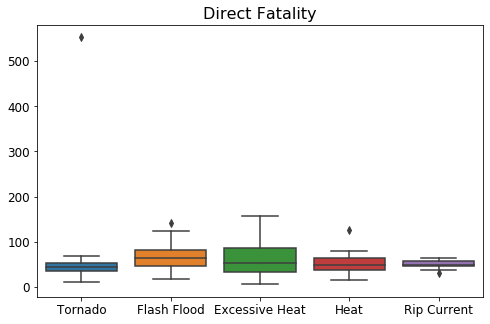

In [27]:
# create and save the yearly direct fatalities by the top five storm types box plot
fig, axs = plt.subplots(figsize=(8, 5))
fig = sns.boxplot(data=df_yearly_deaths)
axs.set_title('Direct Fatality', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.figure.savefig('direct_boxplt.png')

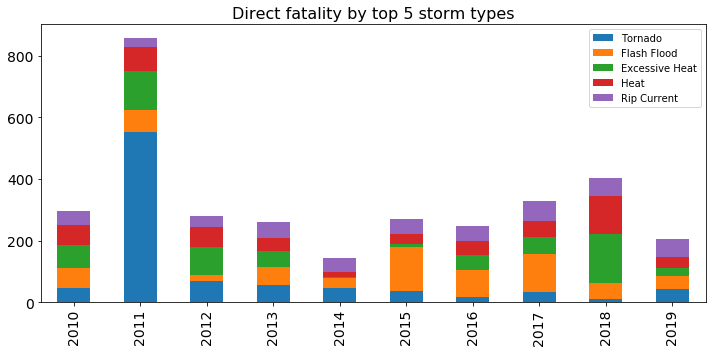

In [28]:
# create and save the yearly direct fatalities by the top five storm types stacked bar plot
fig, axs = plt.subplots(figsize=(10, 5))
df_yearly_deaths.plot(kind='bar', stacked=True, ax=axs)
axs.set_title('Direct fatality by top 5 storm types', fontsize=16)
axs.set_xlabel('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig.savefig('top5_direct_fatalities.png')

## Total fatalities by event type

#### Which storm event types caused the most total fatalities?

In [29]:
# dataframe for fatality grouped by storm type and sorted by total fatality
df_fatality_event = fatality('EVENT_TYPE')\
    .sort_values('DEATHS_TOTAL', ascending=False)

In [30]:
# add cumulative percentage for total fatality
df_fatality_event['cumpercentage'] = df_fatality_event['DEATHS_TOTAL']\
    .cumsum()/df_fatality_event['DEATHS_TOTAL'].sum() * 100

In [31]:
df_fatality_event

,DEATHS_DIRECT,DEATHS_INDIRECT,DEATHS_TOTAL,cumpercentage
EVENT_TYPE,,,,
Tornado,910,26,936,12.362964
Excessive Heat,647,129,776,22.612601
Heat,555,194,749,32.505614
Flash Flood,692,41,733,42.187294
Winter Weather,56,500,556,49.531106
Rip Current,489,7,496,56.082420
Thunderstorm Wind,320,59,379,61.088363
Flood,296,38,334,65.499934
Cold/Wind Chill,260,32,292,69.356756


In [32]:
# fatalities
df_fatality_event.sum()

DEATHS_DIRECT      5586.000000
DEATHS_INDIRECT    1985.000000
DEATHS_TOTAL       7571.000000
cumpercentage      4897.701757
dtype: float64

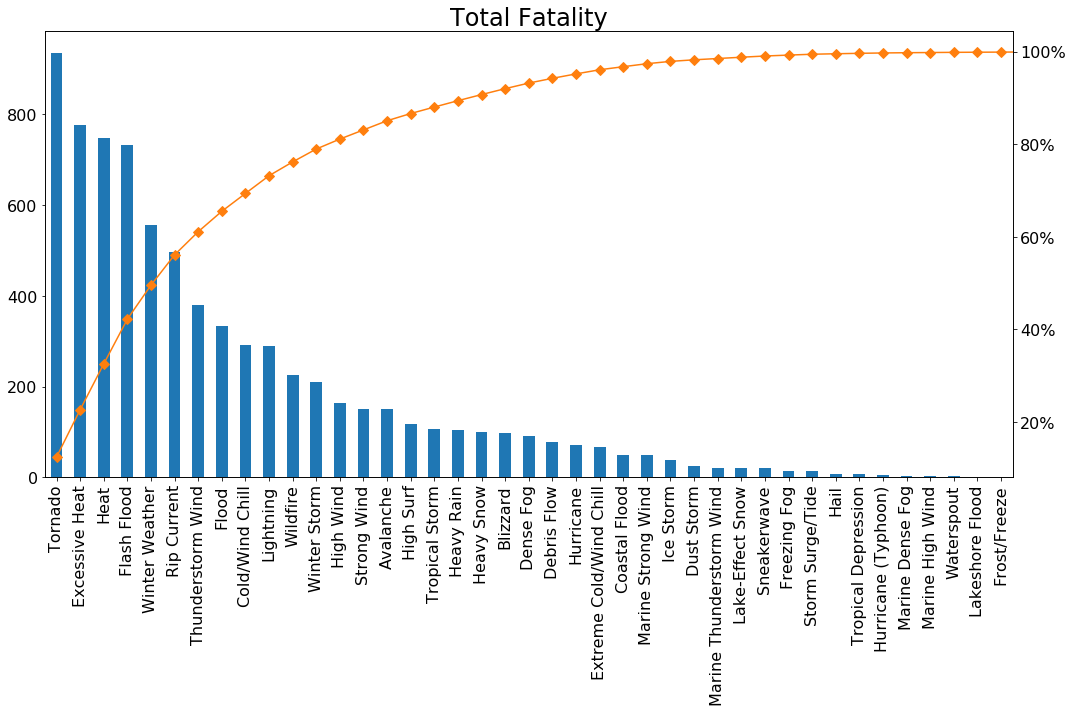

In [33]:
# create and save total_fatalities bar plot

# plot total fatality
fig, axs = plt.subplots(figsize=(15, 10))
df_fatality_event['DEATHS_TOTAL'][:41].plot(kind='bar')
axs.set_title('Total Fatality', fontsize=24)
axs.set_xlabel('', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

# create twin axes
axs2 = axs.twinx()
axs2.yaxis.set_major_formatter(PercentFormatter())

# plot cumulative percentage
axs2.plot(df_fatality_event.index, df_fatality_event['cumpercentage'],
          color="C1", marker="D", ms=7)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

fig.savefig('total_fatalities.png')

In [34]:
# top 5 total fatalities
df_fatality_event['DEATHS_TOTAL'][:5]

EVENT_TYPE
Tornado           936
Excessive Heat    776
Heat              749
Flash Flood       733
Winter Weather    556
Name: DEATHS_TOTAL, dtype: int64

In [35]:
# total fatality by top 5 storm types
df_fatality_event['DEATHS_TOTAL'][:5].sum()

3750

In [36]:
3730/7551 * 100

49.39743080386704

In [37]:
print("49.4% of total fatality was caused by the top 5 strom events.")

49.4% of total fatality was caused by the top 5 strom events.


### Total fatalities by state

In [38]:
df_fatality_state = fatality('STATE').sort_values(
    'DEATHS_TOTAL', ascending=False)

In [39]:
df_fatality_state.head()

,DEATHS_DIRECT,DEATHS_INDIRECT,DEATHS_TOTAL
STATE,,,
TEXAS,467,178,645
NEVADA,359,173,532
CALIFORNIA,342,94,436
FLORIDA,281,140,421
ALABAMA,361,36,397


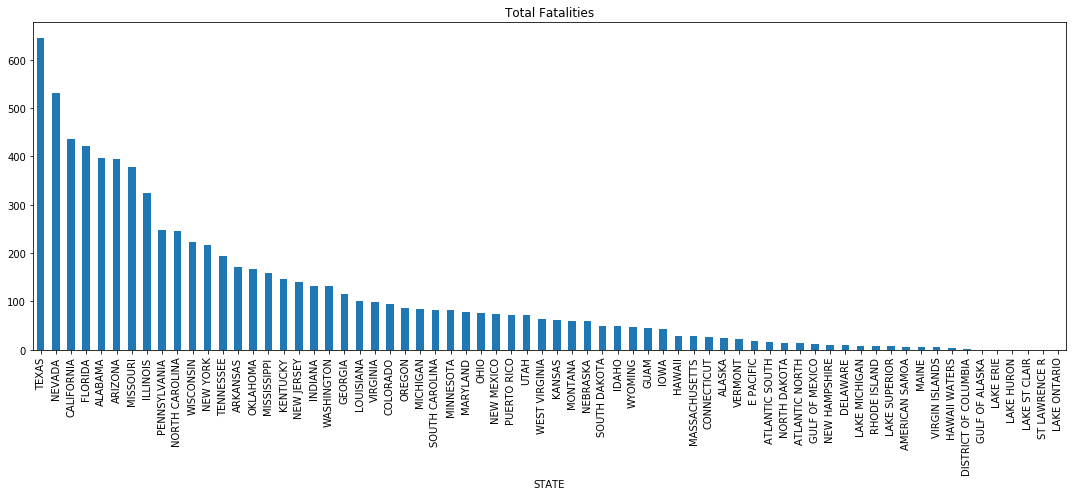

In [40]:
fig, axs = plt.subplots(figsize=(15, 7))
df_fatality_state['DEATHS_TOTAL'].plot(kind='bar')
axs.set_title('Total Fatalities')
plt.tight_layout()

### Total fatalities by year

In [41]:
df_fatality_year = fatality('YEAR').sort_values(
    'DEATHS_TOTAL', ascending=False)

In [42]:
df_fatality_year.head()

,DEATHS_DIRECT,DEATHS_INDIRECT,DEATHS_TOTAL
YEAR,,,
2011,1096,240,1336
2018,728,315,1043
2017,491,230,721
2012,537,170,707
2015,536,165,701


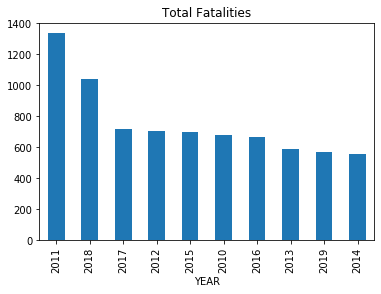

In [43]:
df_fatality_year['DEATHS_TOTAL'] \
    .plot(kind='bar', title='Total Fatalities')

# Property Damage

In [44]:
df_damage = df[['EVENT_ID', 'STATE', 'EVENT_TYPE',
                'YEAR', 'MONTH_NAME', 'DAMAGE_PROPERTY']]

In [45]:
df_damage.count()

EVENT_ID           626777
STATE              626777
EVENT_TYPE         626777
YEAR               626777
MONTH_NAME         626777
DAMAGE_PROPERTY    513777
dtype: int64

In [46]:
# percentage of missing values for DAMAGE_PROPERTY
(626677-513677) / 626777 * 100

18.028740684485868

In [47]:
# check the number of unique EVENT_ID
df_damage['EVENT_ID'].nunique()

626777

In [48]:
# check for yearly missing values for DAMAGE_PROPERTY
df_damage.groupby('YEAR').count()

,EVENT_ID,STATE,EVENT_TYPE,MONTH_NAME,DAMAGE_PROPERTY
YEAR,,,,,
2010,62804,62804,62804,62804,52137
2011,79091,79091,79091,79091,65398
2012,64503,64503,64503,64503,52581
2013,59985,59985,59985,59985,51174
2014,59465,59465,59465,59465,49378
2015,57788,57788,57788,57788,47717
2016,56003,56003,56003,56003,44310
2017,57024,57024,57024,57024,46434
2018,62677,62677,62677,62677,50440


In [49]:
# percentage of yearly missing values
percent_missing = (1 - (df_damage.groupby('YEAR').count()
                        ['DAMAGE_PROPERTY'] / df_damage.groupby('YEAR').count()['STATE'])) * 100

In [50]:
percent_missing

YEAR
2010    16.984587
2011    17.312969
2012    18.482861
2013    14.688672
2014    16.962919
2015    17.427494
2016    20.879239
2017    18.571128
2018    19.523908
2019    19.616828
dtype: float64

In [51]:
percent_missing.describe()

count    10.000000
mean     18.045060
std       1.752355
min      14.688672
25%      17.066682
50%      17.955177
75%      19.285713
max      20.879239
dtype: float64

In [52]:
def convert_billion(damage):
    """ converts property damage(string) into property damage in billions(float) """

    dict_1 = {'K': 0.000001, 'M': 0.001, 'B': 1}

    if str(damage)[-1] in ['K', 'M', 'B']:
        damage = float(damage[:-1]) * dict_1[damage[-1]]

    return float(damage)

In [53]:
df_damage_1 = df_damage.drop(['EVENT_ID'], axis=1)

In [54]:
df_damage_1['DAMAGE_PROPERTY_billion'] = df_damage_1['DAMAGE_PROPERTY'].apply(
    convert_billion)

In [55]:
df_damage_1.head(20)

,STATE,EVENT_TYPE,YEAR,MONTH_NAME,DAMAGE_PROPERTY,DAMAGE_PROPERTY_billion
0,NEW HAMPSHIRE,Heat,2010,July,0.00K,0.000000
1,NEW HAMPSHIRE,Heavy Snow,2010,January,0.00K,0.000000
2,NEW HAMPSHIRE,Strong Wind,2010,October,50.00K,0.000050
3,NEW HAMPSHIRE,Heat,2010,July,0.00K,0.000000
4,NEW HAMPSHIRE,Winter Storm,2010,December,0.00K,0.000000
5,NEW HAMPSHIRE,High Wind,2010,February,2.50M,0.002500
6,NEW HAMPSHIRE,Heavy Snow,2010,February,0.00K,0.000000
7,NEW HAMPSHIRE,Strong Wind,2010,March,10.00K,0.000010
8,FLORIDA,Flash Flood,2010,January,0.00K,0.000000
9,IOWA,Flood,2010,March,50.00K,0.000050


In [56]:
# check statistics of damage property for flash flood
df_damage_1[df_damage_1['EVENT_TYPE'] ==
            'Flash Flood']['DAMAGE_PROPERTY_billion'].describe()

count    38230.000000
mean         0.002007
std          0.095962
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000005
max         10.000000
Name: DAMAGE_PROPERTY_billion, dtype: float64

In [57]:
# find median DAMAGE_PROPERTY_billion for each storm type
# returns a dictionary of medians
storm_types = df_damage_1['EVENT_TYPE'].unique()

medians = []
for event in storm_types:
    medians.append(df_damage_1[df_damage_1['EVENT_TYPE'] == event]
                   ['DAMAGE_PROPERTY_billion'].median())

dict_medians = dict(zip(storm_types, medians))

In [58]:
def impute_damage(cols):
    """ returns imputed damage_property in billions.
        Arg: 
        cols = ['DAMAGE_PROPERTY_billion', 'EVENT_TYPE']
        Return:
        imputed 'DAMAGE_PROPERTY_billion'
    """
    damage = cols[0]
    event_type = cols[1]

    if pd.isnull(damage):
        return dict_medians[event_type]

    else:
        return damage

In [59]:
# apply imputation to DAMAGE_PROPERTY_billiion
df_damage_1['DAMAGE_PROPERTY_billion'] = df_damage_1[[
    'DAMAGE_PROPERTY_billion', 'EVENT_TYPE']].apply(impute_damage, axis=1)

In [60]:
df_damage_1.head(20)

,STATE,EVENT_TYPE,YEAR,MONTH_NAME,DAMAGE_PROPERTY,DAMAGE_PROPERTY_billion
0,NEW HAMPSHIRE,Heat,2010,July,0.00K,0.000000
1,NEW HAMPSHIRE,Heavy Snow,2010,January,0.00K,0.000000
2,NEW HAMPSHIRE,Strong Wind,2010,October,50.00K,0.000050
3,NEW HAMPSHIRE,Heat,2010,July,0.00K,0.000000
4,NEW HAMPSHIRE,Winter Storm,2010,December,0.00K,0.000000
5,NEW HAMPSHIRE,High Wind,2010,February,2.50M,0.002500
6,NEW HAMPSHIRE,Heavy Snow,2010,February,0.00K,0.000000
7,NEW HAMPSHIRE,Strong Wind,2010,March,10.00K,0.000010
8,FLORIDA,Flash Flood,2010,January,0.00K,0.000000
9,IOWA,Flood,2010,March,50.00K,0.000050


In [61]:
# total property damage
df_damage_1['DAMAGE_PROPERTY_billion'].sum()

217.12280303000006

In [62]:
# property damage by flash flood
df_damage_1[df_damage_1['EVENT_TYPE'] ==
            'Flash Flood']['DAMAGE_PROPERTY_billion'].sum()

76.72501931999999

## Billion-dollar storm events

In [63]:
df_damage_billion = df_damage_1[df_damage_1['DAMAGE_PROPERTY_billion'] >= 1]
df_damage_billion.sort_values('DAMAGE_PROPERTY_billion', ascending=False)

,STATE,EVENT_TYPE,YEAR,MONTH_NAME,DAMAGE_PROPERTY,DAMAGE_PROPERTY_billion
33321,CALIFORNIA,Wildfire,2018,November,17.00B,17.00
56447,TEXAS,Flash Flood,2017,August,10.00B,10.00
55840,TEXAS,Flash Flood,2017,August,10.00B,10.00
55657,TEXAS,Flash Flood,2017,August,8.00B,8.00
19923,NEW JERSEY,Coastal Flood,2012,October,7.50B,7.50
55831,TEXAS,Flash Flood,2017,August,7.00B,7.00
20182,NEW JERSEY,Coastal Flood,2012,October,5.00B,5.00
20183,NEW JERSEY,Coastal Flood,2012,October,5.00B,5.00
37016,TEXAS,Flash Flood,2017,August,3.00B,3.00
37812,MISSOURI,Tornado,2011,May,2.80B,2.80


In [64]:
df_damage_billion['EVENT_TYPE'].value_counts()

Flash Flood       10
Flood              6
Tornado            5
Coastal Flood      4
Hail               3
Hurricane          3
Tropical Storm     2
Wildfire           2
High Wind          1
Name: EVENT_TYPE, dtype: int64

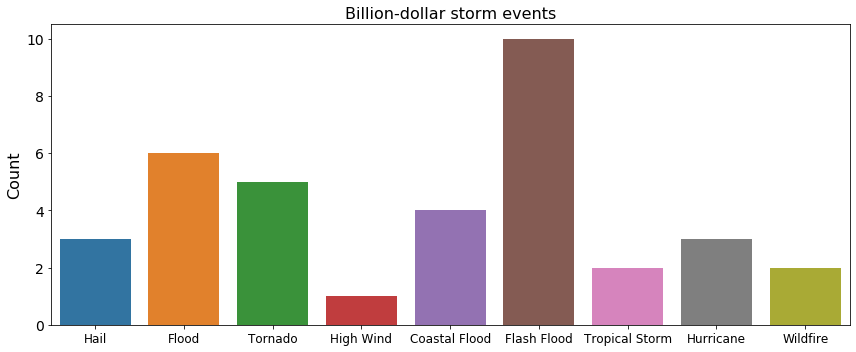

In [65]:
fig, axs = plt.subplots(figsize=(12, 5))
sns.countplot(x='EVENT_TYPE', data=df_damage_billion)
axs.set_title('Billion-dollar storm events', fontsize=16)
axs.set_xlabel('')
axs.set_ylabel('Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.tight_layout()
fig.savefig('billion_dollar_storm.png')

In [66]:
print("There are {} storm events that caused 1 billion or more in property damage."
      .format(df_damage_billion.shape[0]))

There are 36 storm events that caused 1 billion or more in property damage.


In [67]:
df_damage_billion['DAMAGE_PROPERTY_billion'].sum()

115.75

In [68]:
print("The total property damage by billion-dollar storm events is $115.75 billion.")

The total property damage by billion-dollar storm events is $115.75 billion.


In [69]:
115.75/217.12280303000006 * 100

53.31084454727066

In [70]:
print("The billion-dollar storms caused 53% of property damage by all storm events")

The billion-dollar storms caused 53% of property damage by all storm events


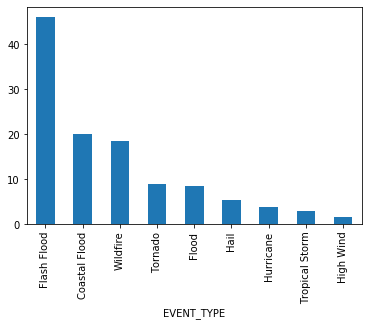

In [71]:
df_damage_billion.groupby('EVENT_TYPE').sum(
)['DAMAGE_PROPERTY_billion'].sort_values(ascending=False).plot(kind='bar')

In [72]:
df_damage_billion.groupby('EVENT_TYPE').sum(
)['DAMAGE_PROPERTY_billion'].sort_values(ascending=False)

EVENT_TYPE
Flash Flood       46.10
Coastal Flood     20.00
Wildfire          18.50
Tornado            8.85
Flood              8.59
Hail               5.46
Hurricane          3.75
Tropical Storm     3.00
High Wind          1.50
Name: DAMAGE_PROPERTY_billion, dtype: float64

## Property damage by event type

#### Which storm events caused the most property damage?

In [73]:
df_damage_event = pd.DataFrame(df_damage_1.groupby('EVENT_TYPE')
                               .sum()['DAMAGE_PROPERTY_billion']
                               .sort_values(ascending=False))

In [74]:
df_damage_event['cumpercentage'] = df_damage_event['DAMAGE_PROPERTY_billion'].cumsum(
) / df_damage_event['DAMAGE_PROPERTY_billion'].sum() * 100

In [75]:
df_damage_event[:10]

,DAMAGE_PROPERTY_billion,cumpercentage
EVENT_TYPE,,
Flash Flood,76.725019,35.337154
Wildfire,22.282317,45.599695
Flood,21.978110,55.722128
Tornado,21.645554,65.691396
Coastal Flood,21.147935,75.431476
Hail,16.547881,83.052915
Hurricane,12.595300,88.853917
Tropical Storm,7.500390,92.308363
High Wind,5.171167,94.690042


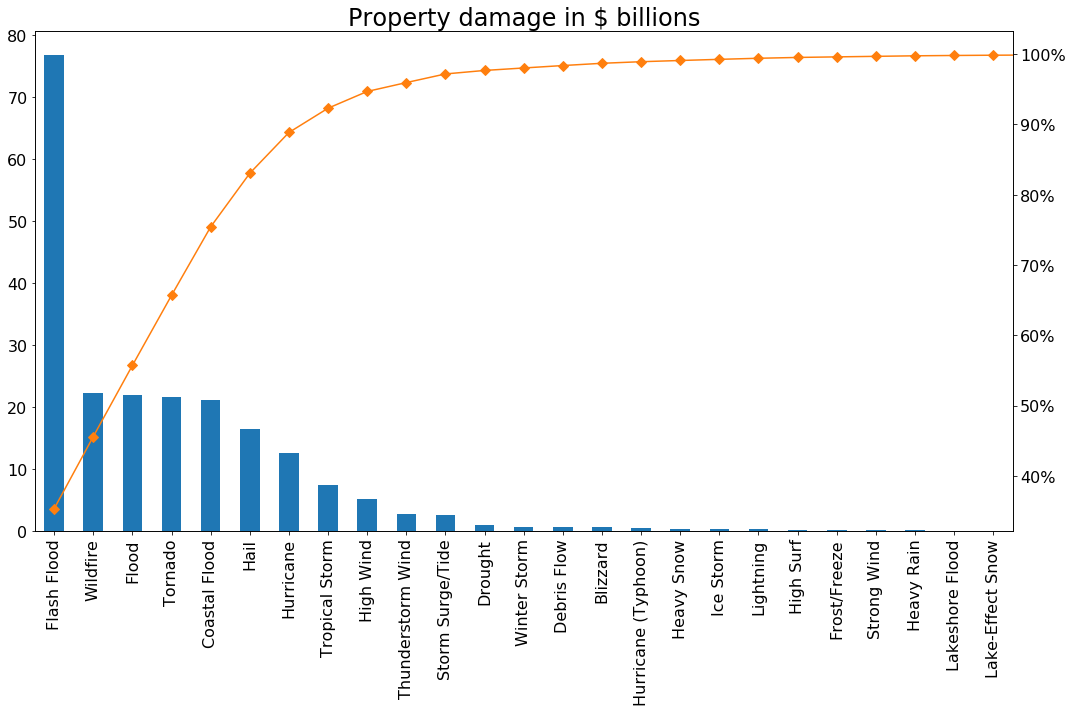

In [76]:
# create and save total_fatalities bar plot

# plot damage_property
fig, axs = plt.subplots(figsize=(15, 10))

df_damage_event['DAMAGE_PROPERTY_billion'][:25].plot(kind='bar')
axs.set_title('Property damage in $ billions', fontsize=24)
axs.set_xlabel('', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

# create twin axes
axs2 = axs.twinx()
axs2.yaxis.set_major_formatter(PercentFormatter())

# plot cumulative percentage
axs2.plot(df_damage_event.index, df_damage_event['cumpercentage'],
          color="C1", marker="D", ms=7)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

fig.savefig('damage_property.png')

In [77]:
# top 5 damage events
top5_damage = ['Flash Flood', 'Wildfire', 'Flood', 'Tornado', 'Coastal Flood']

In [78]:
# total property damage in millions
df_damage_event.sum()

DAMAGE_PROPERTY_billion     217.122803
cumpercentage              5316.989861
dtype: float64

In [79]:
# property damage by the top 5 events
df_damage_event[:5].sum()

DAMAGE_PROPERTY_billion    163.778935
cumpercentage              277.781849
dtype: float64

In [80]:
163.77893544000102/217.12280303000188

0.7543147617589027

In [81]:
print("75.4% of property damage was caused by top 5 strom events.")

75.4% of property damage was caused by top 5 strom events.


## Top 5 property damage by year

#### What are the yearly property damages caused by the top 5 storm event types?

In [82]:
# yearly distribution of top 5 property damage

df_yearly_damage = df_damage_1[df_damage_1['EVENT_TYPE'] == 'Flash Flood']\
    .groupby('YEAR')\
    .sum()['DAMAGE_PROPERTY_billion']

for event in top5_damage[1:]:
    df_yearly_temp = df_damage_1[df_damage_1['EVENT_TYPE'] == event]\
        .groupby('YEAR')\
        .sum()['DAMAGE_PROPERTY_billion']
    df_yearly_damage = pd.concat([df_yearly_damage, df_yearly_temp], axis=1)

df_yearly_damage.columns = top5_damage  # rename the columns

In [83]:
df_yearly_damage

,Flash Flood,Wildfire,Flood,Tornado,Coastal Flood
YEAR,,,,,
2010,0.833800,0.244890,3.093919,1.138660,0.007745
2011,1.356247,0.667217,6.621686,9.685711,0.027274
2012,0.379162,1.460087,0.119051,1.650446,21.049549
2013,0.957033,0.355809,1.215710,3.643278,0.023943
2014,2.476868,0.323811,0.148985,0.623550,0.003387
2015,1.833832,0.022897,0.686595,0.319861,0.014394
2016,3.645402,0.181501,7.066266,0.182726,0.000724
2017,63.118685,0.155965,1.527377,0.636332,0.006311
2018,0.683104,18.842008,0.520451,0.672274,0.014165


In [84]:
df_yearly_damage.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Flash Flood,10.0,7.672502,19.505610,0.379162,0.864609,1.398567,2.316109,63.118685
Wildfire,10.0,2.228232,5.852807,0.022897,0.162349,0.284351,0.589365,18.842008
Flood,10.0,2.197811,2.594729,0.119051,0.561987,1.096890,2.702283,7.066266
Tornado,10.0,2.164555,2.890603,0.182726,0.626746,0.905467,2.732148,9.685711
Coastal Flood,10.0,2.114794,6.653001,0.000445,0.004117,0.010955,0.021556,21.049549


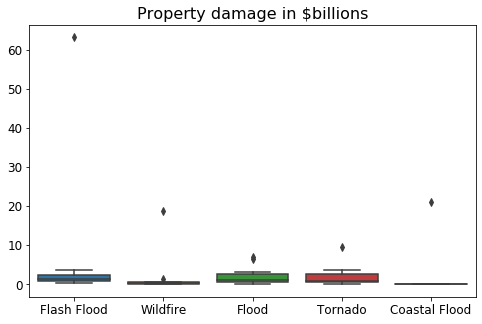

In [85]:
fig, axs = plt.subplots(figsize=(8, 5))
fig = sns.boxplot(data=df_yearly_damage)
axs.set_title('Property damage in $billions', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.figure.savefig('property_boxplt.png')

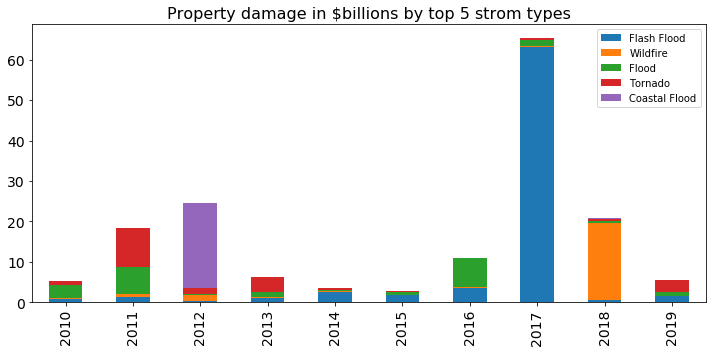

In [86]:
fig, axs = plt.subplots(figsize=(10, 5))
df_yearly_damage.plot(kind='bar',
                      stacked=True,
                      ax=axs)
axs.set_title(
    'Property damage in $billions by top 5 strom types', fontsize=16)
axs.set_xlabel('')
# axs.yaxis.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig.savefig('top5_damage.png')